In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_excel('./Dataset/乳胶枕2018数据.xlsx', sheet_name = '数据')
data_cleaned =df.loc[:, ~df.T.duplicated()]
data_cleaned = data_cleaned.drop(columns=['数据类型','备注', '星期'])
# Display the cleaned dataframe's columns to verify
data_cleaned.columns

Index(['日期', '总下单\n金额', '总支付\n金额', 'PC端支付\n金额', '无线端支付\n金额', '总下单\n件数',
       '总下单\n买家数', '总支付\n件数', 'PC端\n支付件数', '无线端\n支付件数', '总支付\n买家数',
       'PC端支付\n买家数', '无线端支付\n买家数', '总转化', 'PC\n总转化', '无线\n转化', '总\n访客数',
       'PC端\n访客数', '无线端\n访客数', 'PC端平均\n停留时间', '无线端平均\n停留时间', 'PC端日均\n跳出率',
       '无线端日均\n跳出率', '加购人数', '商品收藏\n人数', '总加购\n件数', 'PC端加购\n件数', '无线端加购\n件数',
       '未付款金额', '未付款占比', '未支付\n买家数', '未支付\n占比', '人均\n件数', '真实总\n支付金额',
       '无线真实\n支付金额', '真实支付\n件数', 'PC端真实\n支付件数', '无线端真实\n支付件数', '真实下单\n买家数',
       '真实支付\n买家数', '无线端真实\n支付买家数', '真实人均\n件数', 'PC端真实\n人均件数', '无线端真实\n人均件数',
       '真实\n总转化', 'PC真实\n转化', '无线真实\n转化', '真实总\n客单价', 'PC端真实\n客单价',
       '无线端真实\n客单价', '人均加购\n件数', '总加购率', '总收藏率', '总加收藏\n人数', 'PC端收藏\n人数',
       '过滤\n总转化', '业务加购人数', '业务加购件数', '业务收藏人数', '真实总流量', '真实无线流量', '真实加购人数',
       '真实加购件数', '真实收藏人数', '真实加购率', '真实收藏率', '真实人均加购件数', '过滤加购总转化', '过滤加购无线转化',
       '下单转化率'],
      dtype='object')

In [24]:
pc_range = [col  for col in data_cleaned.columns if 'PC' in col]
mobile_range = [col for col in data_cleaned.columns if '无线' in col]
total_range = [col for col in data_cleaned.columns if col not in (pc_range + mobile_range)]
pc_data, mobile_data = data_cleaned[pc_range], data_cleaned[mobile_range]

In [27]:
pc_data = pc_data.dropna()
pc_data

,PC端支付\n金额,PC端\n支付件数,PC端支付\n买家数,PC\n总转化,PC端\n访客数,PC端平均\n停留时间,PC端日均\n跳出率,PC端加购\n件数,PC端真实\n支付件数,PC端真实\n人均件数,PC真实\n转化,PC端真实\n客单价,PC端收藏\n人数
0,10254.15,53,45,0.0896,502,217.78,0.9004,71,53.0,1.177778,0.089641,227.870000,0
1,11404.64,60,56,0.0483,1160,229.44,0.9233,115,60.0,1.071429,0.048276,203.654286,0
2,8760.00,45,43,0.0418,1028,241.13,0.9368,87,45.0,1.046512,0.041829,203.720930,0
3,8331.22,45,39,0.0402,970,231.08,0.9454,83,45.0,1.153846,0.040206,213.621026,0
4,10575.00,55,52,0.0579,898,231.87,0.9443,96,55.0,1.057692,0.057906,203.365385,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2759.00,11,11,0.0275,400,277.66,0.9025,39,11.0,1.000000,0.027500,250.818182,0
361,6533.00,27,13,0.0385,338,265.40,0.9260,34,27.0,2.076923,0.038462,502.538462,0
362,1912.00,8,7,0.0211,332,290.94,0.9247,22,8.0,1.142857,0.021084,273.142857,0
363,1656.74,7,7,0.0293,239,288.42,0.9163,22,7.0,1.000000,0.029289,236.677143,0


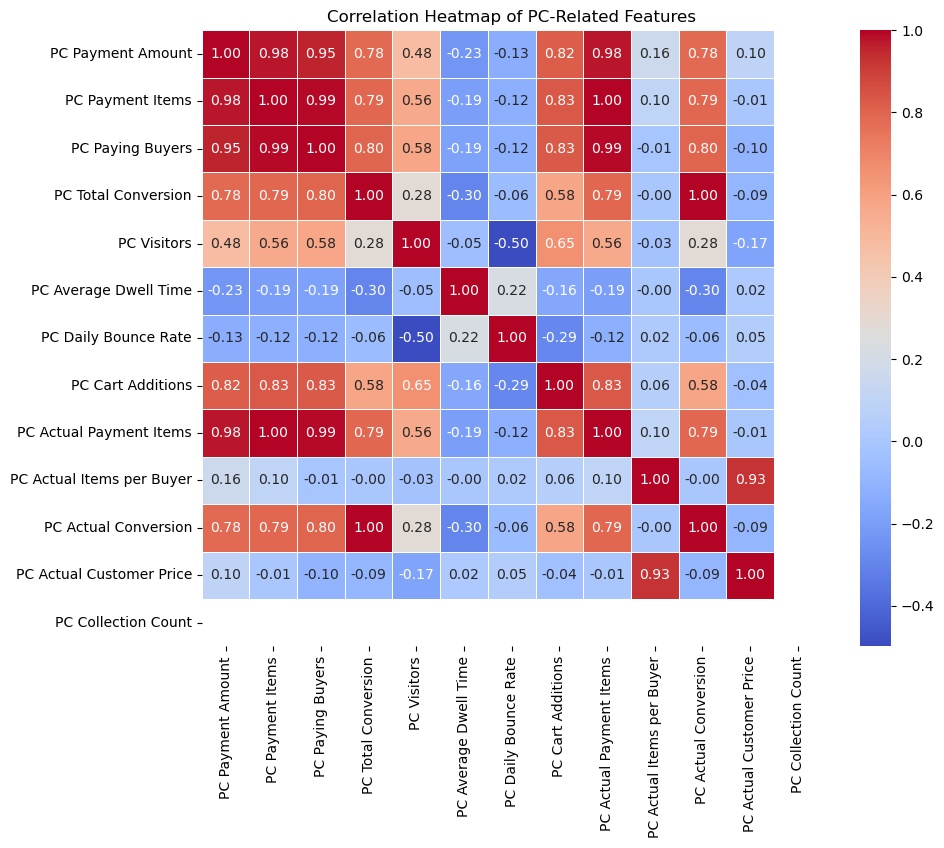

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'pc_data_cleaned' is your cleaned dataset of the 13 PC-related columns
# Dictionary for renaming the columns
rename_dict = {
    'PC端支付\n金额': 'PC Payment Amount',
    'PC端\n支付件数': 'PC Payment Items',
    'PC端支付\n买家数': 'PC Paying Buyers',
    'PC\n总转化': 'PC Total Conversion',
    'PC端\n访客数': 'PC Visitors',
    'PC端平均\n停留时间': 'PC Average Dwell Time',
    'PC端日均\n跳出率': 'PC Daily Bounce Rate',
    'PC端加购\n件数': 'PC Cart Additions',
    'PC端真实\n支付件数': 'PC Actual Payment Items',
    'PC端真实\n人均件数': 'PC Actual Items per Buyer',
    'PC真实\n转化': 'PC Actual Conversion',
    'PC端真实\n客单价': 'PC Actual Customer Price',
    'PC端收藏\n人数': 'PC Collection Count'
}

# Renaming the columns in the dataframe
pc_data = pc_data.rename(columns=rename_dict)


# Calculate the correlation matrix
correlation_matrix = pc_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of PC-Related Features')
plt.show()


In [33]:
data_cleaned['PC端收藏\n人数']

0      0
1      0
2      0
3      0
4      0
      ..
360    0
361    0
362    0
363    0
364    0
Name: PC端收藏\n人数, Length: 365, dtype: int64

In [34]:
import numpy as np

# Generate a normally distributed dataset
np.random.seed(42)  # For reproducibility
data = np.random.normal(loc=50, scale=10, size=1000)  # Mean=50, Std=10, Size=1000

# Calculate median
median = np.median(data)

# Calculate mean
mean = np.mean(data)

# Calculate interquartile range (IQR)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Sample size
n = len(data)

# Estimate the variance of the median using the IQR formula
variance_median_estimate = (IQR**2) / (4 * n)

# Calculate the actual variance of the sample median
variance_median_actual = np.var(data) / n

# Display the results
results = {
    "True Mean": mean,
    "Estimated Mean (Median)": median,
    "Estimated Variance (from IQR formula)": variance_median_estimate,
    "Actual Variance (from data)": variance_median_actual
}

# Print the results
for key, value in results.items():
    print(f"{key}: {value}")


True Mean: 50.193320558223256
Estimated Mean (Median): 50.25300612234888
Estimated Variance (from IQR formula): 0.041960220349291276
Actual Variance (from data): 0.09579049897315173
